In [1]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm
# !pip install pandas
# !pip install numpy
# !pip install graphviz
# !pip install scikit-learn
# !pip install sklearn

# Task 1. Algorithm's analysis

In [116]:
import random
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations, groupby

from networkx.algorithms import tree
from networkx.algorithms import bellman_ford_predecessor_and_distance
from networkx.algorithms import floyd_warshall_predecessor_and_distance

import numpy.typing as npt

### Generating graph

In [ ]:

# You can use this function to generate a random graph with 'num_of_nodes'
# nodes and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi
    graph, but enforcing that the resulting graph is conneted
    (in case of undirected graphs)
    """


    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))

    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)

    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)

    if draw:
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue',
                    with_labels=True,
                    node_size=500,
                    arrowsize=20,
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)

        else:
            nx.draw(G, node_color='lightblue',
                with_labels=True,
                node_size=500)

    return G


{0: {12: {'weight': 16},
  1: {'weight': 20},
  2: {'weight': 4},
  3: {'weight': 13},
  4: {'weight': 7},
  5: {'weight': 12},
  6: {'weight': 15},
  7: {'weight': 2},
  8: {'weight': 18},
  9: {'weight': 15},
  10: {'weight': 8},
  11: {'weight': 6},
  13: {'weight': 7},
  14: {'weight': -3},
  15: {'weight': 11},
  16: {'weight': 9},
  17: {'weight': 5},
  18: {'weight': -5},
  19: {'weight': -2}},
 1: {0: {'weight': 20},
  10: {'weight': 15},
  2: {'weight': -5},
  3: {'weight': 6},
  4: {'weight': -1},
  5: {'weight': 7},
  6: {'weight': 18},
  7: {'weight': 7},
  8: {'weight': 11},
  9: {'weight': -3},
  11: {'weight': 15},
  12: {'weight': 0},
  13: {'weight': 17},
  14: {'weight': -3},
  15: {'weight': 20},
  16: {'weight': 5},
  17: {'weight': 3},
  18: {'weight': 13},
  19: {'weight': -3}},
 2: {0: {'weight': 4},
  1: {'weight': -5},
  16: {'weight': 19},
  3: {'weight': 18},
  4: {'weight': -5},
  5: {'weight': 3},
  6: {'weight': 7},
  7: {'weight': 7},
  8: {'weight': 8},


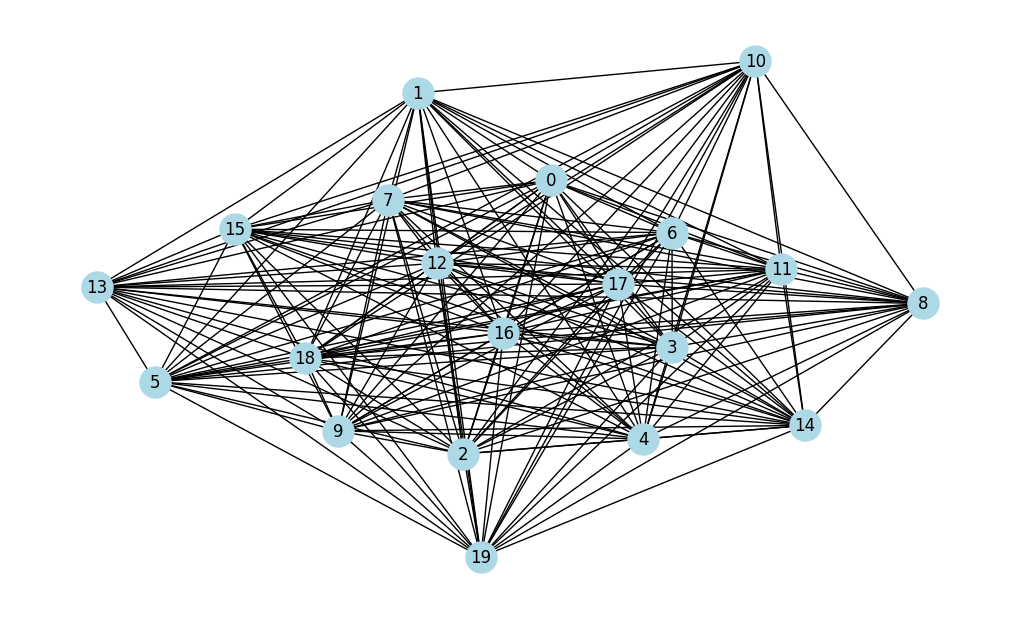

In [111]:
G = gnp_random_connected_graph(20, 1, False, True)
G.edges(data=True)._adjdict

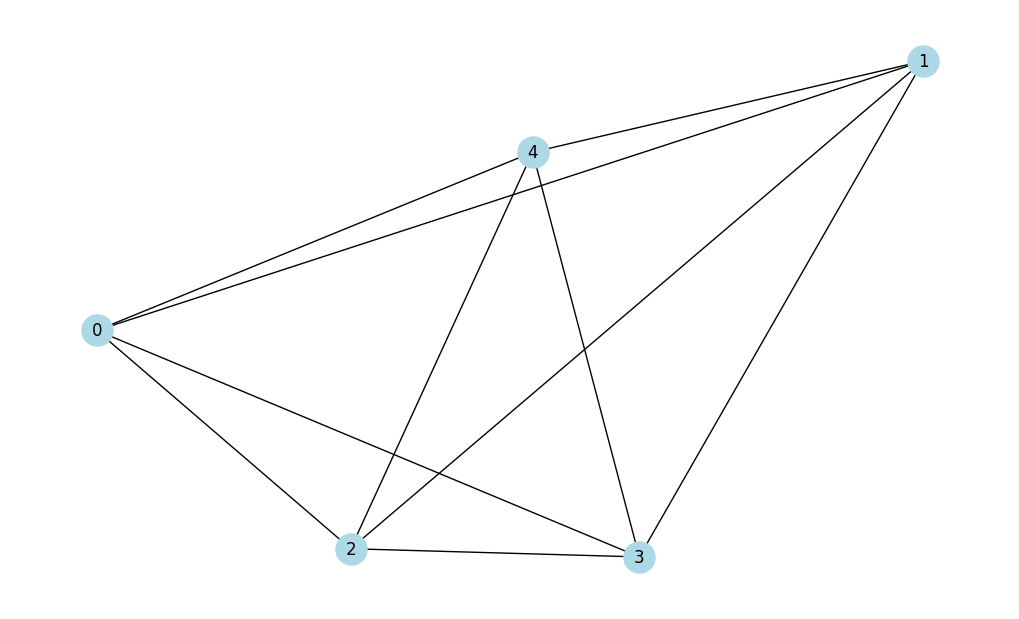

In [ ]:
G = gnp_random_connected_graph(5, 1, False, True)

## Subtask 1.1 (1 point)

### Kruskal's algorithm

#### nx implementation

In [86]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

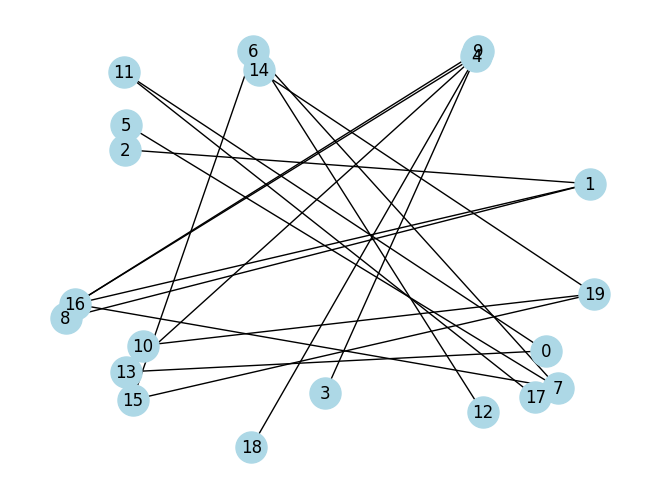

In [87]:
nx.draw(mstk, node_color='lightblue',
        with_labels=True,
        node_size=500)

In [ ]:
mstk.edges(), len(mstk.edges())


(EdgeView([(0, 1), (0, 3), (0, 4), (1, 2)]), 4)

#### Your implementation

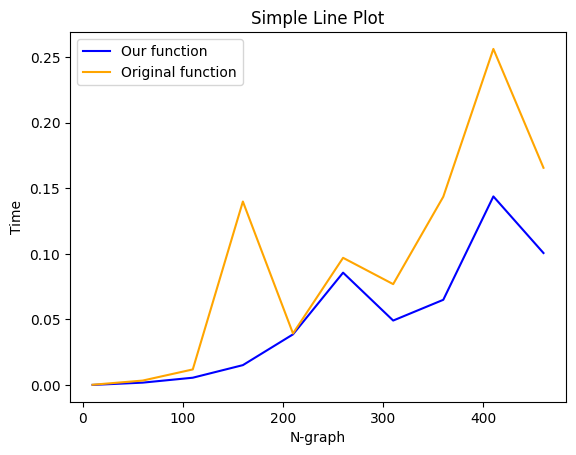

None


In [124]:
import time
class DisJointSet:
    def __init__(self, n):

        self.parents = list(range(n)) #[0,1,2,3]
        self.n_of_verties = [1] * n
        self.levels = [0] * n

    def find(self, x: int) -> int:
        """
        :param x: vertie we are going to find root for
        :return: the root of the x
        """

        try:
            if x != self.parents[x]:

                self.parents[x] = self.find(self.parents[x])

            return self.parents[x]

        except IndexError as e:
            print(f'{e} has happened')
            return None

    def union(self, v_1, v_2):

        root_1 = self.find(v_1)
        root_2 = self.find(v_2)

        if root_1 != root_2:

            if self.levels[root_1] > self.levels[root_2]:#маємо додати другий до першого

                self.parents[root_2] = root_1

                self.n_of_verties[root_1] += self.n_of_verties[root_2]

            elif self.levels[root_1] < self.levels[root_2]:

                self.parents[root_1] = root_2

                self.n_of_verties[root_2] += self.n_of_verties[root_1]

            else:

                self.levels[root_1] += 1

                self.parents[root_2] = root_1

                self.n_of_verties[root_1] += self.n_of_verties[root_2]

            return True

        return False


def kruskal(n, G, show_weight=False):

    edges = list(G.edges(data=True))

    edges = sorted(edges, key=lambda x: x[2]['weight'])#[v_1, v_2, weight_dict]

    graph = DisJointSet(n)

    mst = []


    total_weight = 0
    for v_1, v_2, weight_dict in edges:

        if graph.union(v_1, v_2):

            mst.append((v_1,v_2))

            total_weight += weight_dict['weight']

        if len(mst) == n - 1:
            break

    if show_weight:

        return mst, total_weight

    return mst

def time_of_kraskala(n:int):

    G = gnp_random_connected_graph(n, 1, False, False)
    start = time.time()
    kruskal(n ,G)
    end = time.time()
    time_my_func = end-start
    return time_my_func

def time_of_kraskala_orig(n:int):
    G = gnp_random_connected_graph(n, 1, False, False)
    start = time.time()
    tree.minimum_spanning_tree(G, algorithm="kruskal")
    end = time.time()
    time_my_func = end-start
    return time_my_func

def build_schedule():
    """
    This function help to make schedule about time of working.
    x-value: is amount of tops in graph
    y-value: is time for work with this graph
    """
    x_values = [i for i in range(10, 501, 50)]
    y_values = [time_of_kraskala(n) for n in x_values]
    y_values_original = [time_of_kraskala_orig(n) for n in x_values]
    plt.plot(x_values, y_values, color = "blue", label = "Our function")
    plt.plot(x_values, y_values_original, color = 'orange', label = 'Original function')
    plt.title("Simple Line Plot")
    plt.xlabel("N-graph")
    plt.ylabel("Time")
    plt.legend()
    plt.show()
print(build_schedule())

На цьому графіку можна побачити серйозний розрив у ефективності функції розробленої нашою командою і вкладеної функції з бібліотеки networkx. Після графів які мають приблизно 50 вершин, можна побачити наскільки функція, яка була розроблена нами, є ефективніша, ані ж вкладена (На даній вибірці), що може бути пов'язано з більш обережною обробкою інформації у вкладеній функції, у той час як наша функція розглядає тільки більш конкретні дані. Разом з цим можна помітити в деяких місцях неочікувані коливання, які повязані з непередбачуваністю в утворені графу.

In [89]:
kruskal(200, G, True)

([(1, 8),
  (4, 13),
  (4, 16),
  (4, 18),
  (6, 7),
  (6, 12),
  (7, 16),
  (11, 17),
  (0, 11),
  (0, 13),
  (1, 2),
  (1, 16),
  (3, 9),
  (5, 7),
  (6, 15),
  (9, 16),
  (14, 19),
  (15, 19),
  (10, 19)],
 -80)

#### Additional point (+0.5)

Use DSU (disjoint set union) in implementation of the algorithm

### Prim's algorithm

#### nx implementation

In [ ]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")

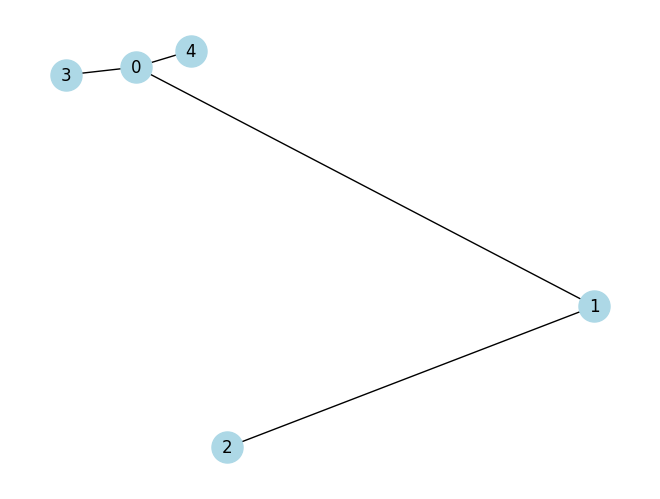

In [ ]:
nx.draw(mstp, node_color='lightblue',
        with_labels=True,
        node_size=500)

In [ ]:
mstp.edges(), len(mstp.edges())

(EdgeView([(0, 1), (0, 3), (0, 4), (1, 2)]), 4)

#### Your implementation

In [ ]:
# code here

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Subtask 1.2 (1 point)

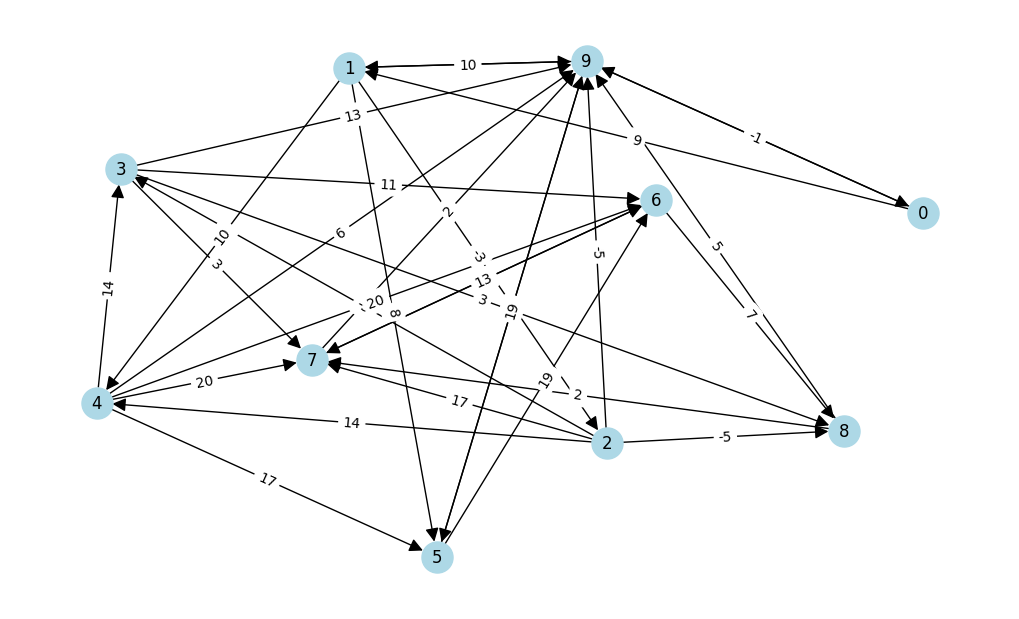

In [ ]:
G = gnp_random_connected_graph(10, 0.5, True, True)

### Bellman-Ford algorithm

#### nx implementation

In [ ]:
# pred is a dictionary of predecessors, dist is a dictionary of distances
try:
    pred, dist = bellman_ford_predecessor_and_distance(G, 0)
    for k, v in dist.items():
        print(f"Distance to {k}:", v)
except:
    print("Negative cycle detected")

Negative cycle detected


#### Your implementation

Negative cycle detected


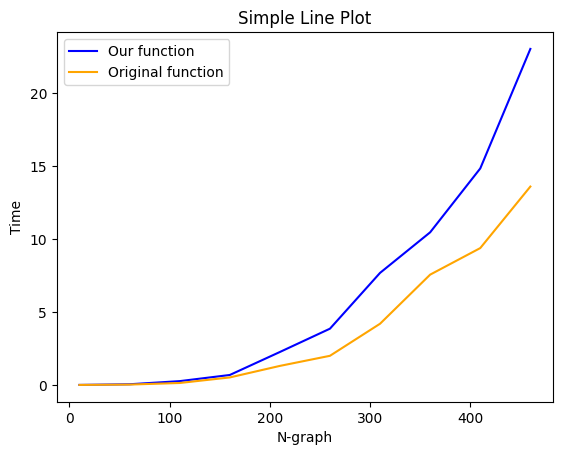

None


In [126]:
"""belman_ford"""
import copy
import time
def belman_ford(graph: dict[int: dict[int:dict[str: int]]], start_point: str):
    """
    Docstring for belman_ford

    >>> graph = {\
    0: {1: {'weight': 10}, 5: {'weight': 8}}, \
    1: {3: {'weight': 2}}, \
    2: {1: {'weight': 1}}, \
    3: {2: {'weight': -2}}, \
    4: {3: {'weight': -1}, 1: {'weight': -4}}, \
    5: {4: {'weight': 1}}\
    }
    >>> print(belman_ford(graph, 0))
    Point 0: Distance 0
    Point 1: Distance 5
    Point 2: Distance 5
    Point 3: Distance 7
    Point 4: Distance 9
    Point 5: Distance 8

    >>> g2 = {\
    0: {1: {'weight': 2}},\
    1: {2: {'weight': 3}},\
    2: {0: {'weight': 1}}\
    }
    >>> print(belman_ford(g2, 0))
    Point 0: Distance 0
    Point 1: Distance 2
    Point 2: Distance 5

    >>> print(belman_ford({0: {1: {'weight': 10}, \
    2: {'weight': 1}}, 2: {1: {'weight': 2}}, 1: {}}, 0))
    Point 0: Distance 0
    Point 2: Distance 1
    Point 1: Distance 3


    >>> print(belman_ford({1: {2: \
    {'weight': 10}}, 2: {3: {'weight': -15}}, 3: {}}, 1))
    Point 1: Distance 0
    Point 2: Distance 10
    Point 3: Distance -5



    """

    point_weight = {start_point: 0}
    for point in graph:
        if point!=start_point:
            point_weight[point] = 'inf'

    for i in range(len(graph)):
        point_weight_after = copy.deepcopy(point_weight)
        for top, next_point_weight in graph.items():
            if point_weight_after[top] == 'inf':
                continue
            for next_top, top_weight in next_point_weight.items():
                if (point_weight_after[next_top] == 'inf'
                or point_weight_after[next_top]>top_weight['weight']+point_weight_after[top]):
                    point_weight_after[next_top] = top_weight['weight']+point_weight_after[top]
        if i == len(graph)-1 and point_weight!=point_weight_after:
            return 'Negative cycle detected'
        else:
            point_weight = point_weight_after
    final_return = [f'Point {point}: Distance {weight}'for point, weight in point_weight.items()]
    return "\n".join(final_return)


print(belman_ford(G.edges(data=True)._adjdict, 0))



def time_of_belman(n:int):

    G = gnp_random_connected_graph(n, 1, False, False)
    start = time.time()
    belman_ford(G.edges(data=True)._adjdict, 0)
    end = time.time()
    time_my_func = end-start
    return time_my_func

def time_of_belman_orig(n:int):
    G = gnp_random_connected_graph(n, 1, False, False)
    start = time.time()
    try:
        dist = bellman_ford_predecessor_and_distance(G, 0)[-1]
        for k, v in dist.items():
            print(f"Distance to {k}:", v)
    except:
        None
    end = time.time()
    time_my_func = end-start
    return time_my_func

def build_schedule():
    """
    This function help to make schedule about time of working.
    x-value: is amount of tops in graph
    y-value: is time for work with this graph
    """
    x_values = [i for i in range(10, 501, 50)]
    y_values = [time_of_belman(n) for n in x_values]
    y_values_orig = [time_of_belman_orig(n) for n in x_values]
    plt.plot(x_values, y_values, color = 'blue', label = 'Our function')
    plt.plot(x_values, y_values_orig, color = 'orange', label = 'Original function')
    plt.title("Simple Line Plot")
    plt.xlabel("N-graph")
    plt.ylabel("Time")
    plt.legend()
    plt.show()
print(build_schedule())


На даному графіку можна побачити ефективність роботи алгоритму Белмана-Форда розробленого нашою командою, і вкладену функцію, з бібліотеки networkx. На графіку можна побачити що графи у яких є до 100 вершин, обробляються майже однаково швидко, у той час як після цього, вже є помітніша ефективність у вкладеної функції.

### Floyd-Warshall algorithm

#### nx implementation

In [ ]:
# pred is a dictionary of predecessors, dist is a dictionary of distances dictionaries
try:
    pred, dist = floyd_warshall_predecessor_and_distance(G)
    for k, v in dist.items():
        print(f"Distances with {k} source:", dict(v))
except:
    print("Negative cycle detected")

Distances with 0 source: {0: 0, 1: 10, 6: 1, 8: 8, 2: 8, 3: 4, 4: 23, 5: 1, 7: -2, 9: 3}
Distances with 1 source: {1: 0, 8: 1, 3: -3, 4: 13, 5: -6, 7: -9, 0: 11, 2: 1, 6: -6, 9: -4}
Distances with 2 source: {2: 0, 3: 11, 8: 15, 0: 25, 1: 35, 4: 48, 5: 8, 6: 8, 7: 5, 9: 10}
Distances with 3 source: {3: 0, 5: -3, 6: -3, 9: -1, 0: 14, 1: 24, 2: 4, 4: 37, 7: -6, 8: 4}
Distances with 4 source: {4: 0, 9: -3, 5: -5, 8: 2, 0: 12, 1: 22, 2: 2, 3: -2, 6: -5, 7: -8}
Distances with 5 source: {5: 0, 6: 0, 7: -3, 0: 17, 1: 27, 2: 7, 3: 3, 4: 40, 8: 7, 9: 2}
Distances with 6 source: {6: 0, 0: 17, 7: -3, 8: 7, 1: 27, 2: 7, 3: 3, 4: 40, 5: 0, 9: 2}
Distances with 7 source: {7: 0, 8: 10, 0: 20, 1: 30, 2: 10, 3: 6, 4: 43, 5: 3, 6: 3, 9: 5}
Distances with 8 source: {8: 0, 9: -5, 0: 10, 1: 20, 2: 0, 3: -4, 4: 33, 5: -7, 6: -7, 7: -10}
Distances with 9 source: {9: 0, 2: 5, 3: 1, 0: 15, 1: 25, 4: 38, 5: -2, 6: -2, 7: -5, 8: 5}


#### Your implementation

In [ ]:
# code here

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Useful explanations

### How to get list of edges for your algorithm


In [105]:
edges = list(G.edges()._adjdict) # by default G.edges are EdgesView class

In [106]:
edges[:5]

[0, 1, 2, 3, 4]

### To get edges with weights

In [ ]:
edges = list(G.edges(data=True))

In [104]:
edges[:5]

[0, 1, 2, 3, 4]

In [107]:
nodes = list(G.nodes())
print(nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


### Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [ ]:
import time
from tqdm import tqdm

In [ ]:
NUM_OF_ITERATIONS = 1000
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):

    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.4, False)

    start = time.time()
    tree.minimum_spanning_tree(G, algorithm="prim")
    end = time.time()

    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [00:06<00:00, 143.94it/s]


0.002600704908370972

# Task 2. Decision Tree Classifier

In [ ]:
# scikit-learn package
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## General idea


You are expected to write a quite simple, yet good core logic of decision tree classifier class. Additionaly, you need to test your results and write down a report on what you've done, which principles used and explain the general process.

Hopefully, you have already learned what is decision tree classifier and how it work. For better understanding, and in case if something is still unclear for you, here are some useful links on basics of DTC:
- https://www.youtube.com/watch?v=ZVR2Way4nwQ
- https://towardsdatascience.com/decision-tree-classifier-explained-a-visual-guide-with-code-examples-for-beginners-7c863f06a71e
- https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial
- https://medium.com/data-science/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575

Also, for those interested to learn more about machine learning and particulary Desicion Trees - here is a great course on Coursera (you may be interested in the whole course or just this particular week):
- https://www.coursera.org/learn/advanced-learning-algorithms/home/week/4

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Dataset

You can use Iris dataset for this task. It is a very popular dataset for machine learning and data science. It contains 150 samples of 3 different species of Iris flowers (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
Read more on this: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
https://en.wikipedia.org/wiki/Iris_flower_data_set

However, using more interesting and intricate datasets is much appreciated. You can use any dataset you want, but it should be a classification one. For example you can use breast cancer or wine datasets, which are also available in sklearn.datasets. Or you can use any other dataset you find interesting.

P.S. In case you are not sure if your dataset is suitable, feel free to ask assistants :).

In [ ]:
# Load dataset
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.data.shape

(150, 4)

This means that we have 150 entries (samples, infos about a flower). The columns being: Sepal Length, Sepal Width, Petal Length and Petal Width(features). Let's look at first two entries:

In [ ]:
iris.data[0:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

### To undestand data little bit better, let's plot some features

Text(0, 0.5, 'Sepal width')

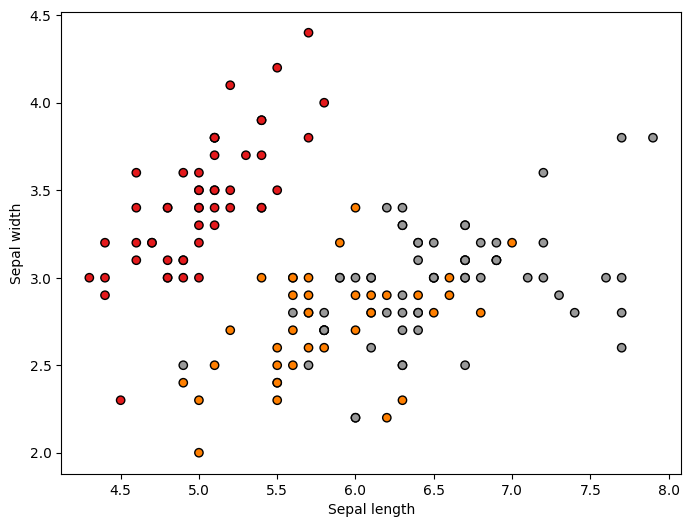

In [ ]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

From this we can clearly see, that even basing on those two parameters, we can clearly divide (classify) out data into several groups. For this, we will use decision tree classifier: https://scikit-learn.org/stable/modules/tree.html#tree


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Example of usage

**Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression**. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [ ]:
clf = DecisionTreeClassifier()

X, y = iris.data, iris.target
X.shape, y.shape

((150, 4), (150,))

### Train / test split

We train our model using training dataset and evaluate its performance basing on the test dataset. Reason to use two separate datasets is that our model learns its parameters from data, thus test set allows us to check its possibilities on completely new data.

In [ ]:
X, X_test, y, y_test = train_test_split(X, y, test_size= 0.20)
X_test.shape, y_test.shape

((30, 4), (30,))

### Model learning

It learns its parameters (where it should split data and for what threshold value) basing on the training dataset. It is done by minimizing some cost function (e.g. Gini impurity or entropy).

In [ ]:
clf = clf.fit(X, y)

### Visualization of produced tree

You do not need to understand this piece of code :)

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Prediction step

Now we can use our model to predict which type has a flower, basing on its parameters.

This is conducted basically via traversing the tree that you can see above.

In [ ]:
predictions = clf.predict(X_test)

### We can also measure the accuracy of our model

In [ ]:
sum(predictions == y_test) / len(y_test)

To get clearer intuition about predicion, let's look at those X, that should be labeled to some flower

In [ ]:
y_test


Here you can traverse the tree above by yourself and make sure that prediction works

In [ ]:
X_test[1]

In [ ]:
clf.predict([X_test[1]])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Decision tree classifier (2 point)

###  Gini impurity


Decision trees use the concept of Gini impurity to describe how “pure” a node is. A node is pure (G = 0) if all its samples belong to the same class, while a node with many samples from many different classes will have a Gini closer to 1.

$G = 1 - \sum_{k=1}^{n}p_{k}^2$

For example, if a node contains five samples, with two belonging to the first class (first flower), two of class 2, one of class 3 and none of class 4, then

$G = 1 - (\frac{2}{5})^2 - (\frac{2}{5})^2 - (\frac{1}{5})^2 = 0.64$


### Remarks


- We recommend using additional functions in `DecisionTreeClassifier` class, to make the implementation process easier.

In [ ]:
import numpy as np
import numpy.typing as npt

class Node:
    def __init__(self, X: npt.NDArray, y: npt.NDArray):
        self.X = X
        self.y = y
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.value = None  # for leaf

In [ ]:
class DecisionTreeClassifier:
    def __init__(self, max_depth: int) -> None:
        self.max_depth = max_depth
        self.tree = None
        self.number_of_classes = None

    def gini(self, y: npt.NDArray) -> float:
        gini = 1.0
        for cls in np.unique(y):
            p = np.sum(y == cls) / len(y)
            gini -= p ** 2
        return gini

    def majority_class(self, y: npt.NDArray):
        values, counts = np.unique(y, return_counts=True)
        return values[np.argmax(counts)]


    def best_split(self, X, y):
        best_feature, best_threshold = None, None
        best_gain = 0
        parent_gini = self.gini(y)

        n_samples, n_features = X.shape

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])

            for t in thresholds:
                left_mask = X[:, feature] <= t
                right_mask = ~left_mask

                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                y_left = y[left_mask]
                y_right = y[right_mask]

                gain = parent_gini \
                        - (len(y_left)/n_samples)*self.gini(y_left) \
                        - (len(y_right)/n_samples)*self.gini(y_right)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = t

        return best_feature, best_threshold

    def build_tree(self, X, y, depth=0):
        node = Node(X, y)

        # stopping conditions
        if depth == self.max_depth or len(np.unique(y)) == 1:
            node.value = self.majority_class(y)
            return node

        feature, threshold = self.best_split(X, y)

        if feature is None:
            node.value = self.majority_class(y)
            return node

        node.feature_index = feature
        node.threshold = threshold

        left_mask = X[:, feature] <= threshold
        right_mask = ~left_mask

        node.left = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        node.right = self.build_tree(X[right_mask], y[right_mask], depth + 1)

        return node


    def fit(self, X: npt.NDArray, y: npt.NDArray) -> None:
        self.number_of_classes = np.unique(y).size
        self.tree = self.build_tree(X, y)

    def _predict_one(self, x, node: Node):
        if node.value is not None:
            return node.value

        if x[node.feature_index] <= node.threshold:
            return self._predict_one(x, node.left)
        else:
            return self._predict_one(x, node.right)

    def predict(self, X_test: npt.NDArray) -> list:
        return [self._predict_one(x, self.tree) for x in X_test]

    def evaluate(self, X_test: list[list], y_test: list) -> float:
        """
        Returns accuracy of the model (ratio of right guesses to the number of samples)
        """
        predictions = self.predict(X_test)

        correct = 0
        for y_pred, y_true in zip(predictions, y_test):
            if y_pred == y_true:
                correct += 1

        return correct / len(y_test)


In [ ]:
!python -m venv venv

In [ ]:
!venv\Scripts\activate

In [ ]:
!pip install scikit-learn

### Your implementation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

print("Accuracy:", clf.evaluate(X_test, y_test))

#### Additional point (+0.5)

Use Laplace smoothing, explain what is the point of using it

Виснавок:
В цій лабораторній роботі ми змогли засвоїти нову бібліотеку для оброблення графів і краще познайомилися з певними алгоритмами. Наші алгоритми показали хороші результати при відносно малій кількості вершин (До 50), разом з цим деякі наші алгоритми виявились ефективнішими, за рахунок вужчої вибірки в обробці інформації, навідміно від вкладених.